# Analizando datos del programa SEER DEL NCI sobre el Cáncer de Mama

Autor: Javier Madriz  
Fecha: 20 de Junio de 2023


## Introducción

Este análisis se basa en un conjunto de datos de pacientes con cáncer de mama obtenido del Programa SEER del NCI, actualizado en noviembre de 2017. El Programa SEER recopila estadísticas de cáncer basadas en la población y proporciona información invaluable para comprender y abordar esta enfermedad.

El conjunto de datos se centra en mujeres diagnosticadas con cáncer de mama invasivo entre los años 2000 y 2017. Contiene una amplia gama de información, incluyendo edad, raza, origen étnico, etapa del cáncer, tamaño del tumor, grado y tratamiento del paciente. Estos datos son de gran importancia para la investigación y la toma de decisiones en el ámbito de la salud.

Es importante destacar que estos datos se comparten bajo la licencia internacional Creative Commons Attribution 4.0, lo que permite su uso y distribución siempre y cuando se cite correctamente la fuente original. En este caso, se cita el conjunto de datos de la siguiente manera:

**Cita:**
JING TENG, 18 de enero de 2019, "Datos de cáncer de mama SEER", puerto de datos IEEE, doi: [https://dx.doi.org/10.21227/a9qy-ph35](https://dx.doi.org/10.21227/a9qy-ph35).

Este análisis tiene como objetivo explorar y comprender mejor los patrones y las características de los pacientes con cáncer de mama en este conjunto de datos. Mediante el uso de herramientas de análisis y visualización de datos, buscaremos identificar tendencias, asociaciones y posibles insights que puedan contribuir al avance en el diagnóstico y tratamiento de esta enfermedad.

¡Sigue leyendo para descubrir los hallazgos y conclusiones derivados de este análisis de datos!


## Carga de datos
En esta sección se llevará a cabo la carga de los datos desde un archivo CSV o cualquier otra fuente de datos utilizada. Se utilizarán herramientas y librerias como pandas y otras para manejar y preparar los datos para su posterior análisis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer-de-mama.csv')
df.head(3)

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead


## Exploración de datos

En esta sección se realizará una exploración inicial de los datos, incluyendo un análisis descriptivo, resumen estadístico y visualización de algunas variables clave. Se buscará comprender la estructura de los datos y detectar posibles valores atípicos o faltantes.

In [3]:
df.dtypes

Age                         int64
Race                       object
Marital Status             object
Unnamed: 3                float64
T Stage                    object
N Stage                    object
6th Stage                  object
Grade                      object
A Stage                    object
Tumor Size                  int64
Estrogen Status            object
Progesterone Status        object
Regional Node Examined      int64
Reginol Node Positive       int64
Survival Months             int64
Status                     object
dtype: object

**El data set tiene las siguientes caracteristicas**
**Variables numericas:**


*   Age: Edad del paciente
*   Tumor Size: Tamaño del tumor
*   Regional Node Examined: Ganlios examinados
*   Regional Node Positive: Quistes que dieron positivo
*   Survival Months: Meses de supervivencia

**Variables categoricas:**
*   Race: Raza del paciente
*   Marital status: Estado civil
*   T stage: Tamaño y extension del tumor
*   N stage: Numero de ganglios afectados
*   6th Stage: Estado general del cancer
*   Grade: Grado del cancer
*   A stage: Estado de metastasis
*   Elemento de lista
*   Strogen status: Estado de estrogenos
*   Progesterone Status: Estado de progesterona
*   Status: Status del paciente: Vivo o muerto















In [4]:
df.shape

(4024, 16)

El dataset  tiene 16 columnas y 4024 registros

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

No tenemos valores nulos, excepto para la columna **unnamed**

In [6]:
df.isnull().sum()

Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64

Eliminaremos la columna Unnamed:3, tiene toda la pinta que es un error en la carga de datos

In [7]:
df.drop('Unnamed: 3', axis=1, inplace=True)
df.head(2)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0


A través del método describe, realizamos un análisis estadístico descriptivo de las variables numéricas en nuestro conjunto de datos. Este resumen nos brinda una visión general de las características de los datos, lo que nos permite obtener una primera impresión y establecer un punto de partida sólido para abordar nuestras preguntas de investigación.

**Revision de rangos en variables**

In [9]:
age_min, age_max = df['Age'].min(), df['Age'].max()
print(f'Edad Minima {age_min}, Edad Maxima {age_max}')

Edad Minima 30, Edad Maxima 69


En nuestra exploración del rango de edad de los pacientes, nos aseguramos de identificar posibles valores atípicos que podrían afectar el resumen estadístico. Por ejemplo, buscamos descartar registros de edades excesivamente altas, como 200 años, ya que científicamente sabemos que es improbable que una persona viva tanto tiempo. La detección de estos valores atípicos es esencial para obtener un análisis preciso y confiable de las edades de los pacientes.

## Revision  de Categorias unicas
A continuacion aplicaremos el metodo unique a nuestras columnas. Al aplicar el método unique a todas las columnas de nuestro conjunto de datos, obtenemos una lista de valores únicos para cada una de ellas. Esto nos permite identificar la diversidad de categorías o valores distintos presentes en cada columna. Esta información es importante para comprender la variabilidad de los datos y puede ayudarnos a detectar posibles errores o inconsistencias en la captura de información.

El análisis de los valores únicos nos brinda una visión más detallada de la estructura y la calidad de nuestros datos. Además, nos permite identificar posibles problemas, como valores faltantes, registros duplicados o categorías inesperadas. Con esta información, podemos tomar decisiones informadas sobre el preprocesamiento de los datos y garantizar la integridad y confiabilidad de nuestro análisis.

In [10]:
race_type = df['Race '].unique()

In [11]:
df['Marital Status'].unique()

array(['Married (including common law)', 'Divorced',
       'Single (never married)', 'Widowed', 'Separated'], dtype=object)

In [12]:
df['Status'].unique()

array(['Alive', 'Dead'], dtype=object)

In [13]:
df['Grade'].unique()

array(['Moderately differentiated; Grade II',
       'Poorly differentiated; Grade III', 'Well differentiated; Grade I',
       'Undifferentiated; anaplastic; Grade IV'], dtype=object)

In [14]:
df['T Stage '].unique()

array(['T2', 'T1', 'T3', 'T4'], dtype=object)

## Conversion de tipo de dato para columna T Stage

In [15]:
df['T Stage '] = df['T Stage '].astype('category')
df['T Stage '] = df['T Stage '].cat.as_ordered()
df['T Stage '].dtypes

CategoricalDtype(categories=['T1', 'T2', 'T3', 'T4'], ordered=True)

La columna 'T Stage' representa el estado del tumor en el contexto del cáncer de mama. Según investigaciones médicas, a medida que el número de T Stage aumenta, indica una mayor propagación y tamaño del tumor. Con el objetivo de aprovechar esta información y facilitar el análisis, hemos convertido el tipo de datos de esta columna a categórico.

Al cambiar el tipo de datos a categórico, nos permitirá realizar ordenamientos lógicos, realizar análisis estadísticos específicos y obtener una mejor comprensión de las características del tumor en función de su estado. Para obtener más información sobre la clasificación y estadificación del cáncer de mama, se puede consultar [Instituto Nacional del Cancer](https://www.cancer.gov/espanol/cancer/diagnostico-estadificacion/estadificacion)
.

## Eliminacion de espacios en nombres de columnas
Tenemos algunas columnas que en sus nombres o encabezados contienen un espacio al inicio o al final lo que corregiremos para evitar inconvenientes

In [16]:
columns = df.columns
new_columns = [column.strip() for column in columns]
df.columns = new_columns

# Inicio de Análisis de Datos
En esta sección, exploraremos el conjunto de datos y trataremos de responder las siguientes preguntas:

* ¿Cuál es la distribución de edades de los pacientes en el conjunto de datos?
* ¿Cuántos pacientes se encuentran en cada grupo de edad?
* ¿Existe alguna correlación entre el tamaño del tumor y el número de ganglios examinados?
* ¿Cuál es la tasa de supervivencia promedio en meses para los pacientes?
* ¿Hay diferencias en la tasa de supervivencia entre pacientes de diferentes razas?
* ¿Existe alguna relación entre el tamaño del tumor y el estado de metástasis?
* ¿Cuántas personas mueren según la edad en nuestro conjunto de datos?
* Hay diferencias significativas en la proporción de supervivientes y fallecidos en diferentes grupos de edad?
* Extiste una relacion o asociacion entre el rango de edad de los pacientes y el status "sobrevivientes y fallecidos"?



## ¿Cuál es la distribución de edades de los pacientes en el conjunto de datos?

In [38]:
df['Age'].describe()


count    4024.000000
mean       53.972167
std         8.963134
min        30.000000
25%        47.000000
50%        54.000000
75%        61.000000
max        69.000000
Name: Age, dtype: float64

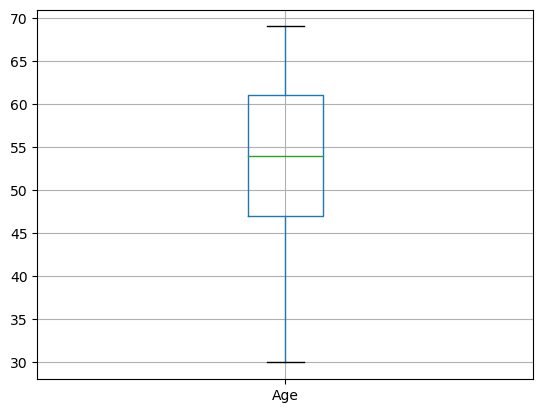

In [18]:
df.boxplot(column='Age')
plt.show()



* La edad mínima registrada en el conjunto de datos es de 30 años, lo que indica que hay pacientes relativamente jóvenes.

* La edad máxima registrada es de 69 años, lo que sugiere la presencia de pacientes adultos mayores en el conjunto de datos.

* La edad promedio de los pacientes es de 54 años, lo que proporciona una idea general de la edad promedio de los pacientes con cáncer.

* El percentil 25 (Q1) es de 47 años, lo que significa que el 25% de los pacientes tiene menos de 47 años.

* El percentil 75 (Q3) es de 61 años, lo que indica que el 25% de los pacientes tiene más de 61 años.

* La mediana (percentil 50 o Q2) es de 54 años, lo que significa que el 50% de los pacientes tiene menos de 54 años y el otro 50% tiene más de 54 años.

  Estos hallazgos iniciales nos brindan una visión general de la distribución de edades en nuestro conjunto de datos

<h4>Cantidad de pacientes dentro del IQR</h4>

In [19]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)

data_into_box = df[(df['Age']>= q1) & (df['Age'] <= q3)]
count_intobox_data = data_into_box['Age'].count()
proportion = count_intobox_data / len(df['Age'] * 100)
print(count_intobox_data)
print(proportion)

2136
0.5308151093439364


Además de examinar los estadísticos descriptivos, realizamos un conteo de los pacientes que se encuentran dentro del rango intercuartílico (IQR). Encontramos que 2136 pacientes se sitúan dentro de este rango, lo que representa aproximadamente 53% del total de pacientes en el conjunto de datos. Este resultado destaca la importancia de considerar la dispersión de las edades y nos proporciona una comprensión más detallada de la distribución de edades en nuestro estudio de cáncer de mama.


## ¿Cuántos pacientes se encuentran en cada grupo de edad?

In [20]:
df_age_distribution = df.groupby('Age').size().reset_index(name='People').sort_values(by='Age')
df_age_distribution

,Age,People
0,30,5
1,31,14
2,32,13
3,33,15
4,34,14
5,35,20
6,36,24
7,37,28
8,38,45
9,39,52


### Exportacion

In [42]:
df_age_distribution.to_csv('./df_resultantes/age_distribution.csv', index=False)

<p> Al analizar la distribución de pacientes según su edad, se observa una tendencia interesante. Para edades más jóvenes, se registra un número relativamente bajo de pacientes. Sin embargo, a medida que la edad aumenta, se observa un incremento significativo en el número de pacientes correspondientes a esa edad. Esto sugiere una posible correlación entre la edad y la prevalencia del cáncer en la población estudiada. </p>

## ¿Existe alguna correlación entre el tamaño del tumor y el número de ganglios examinados?

In [21]:
correlation = df[['Tumor Size', 'Regional Node Examined']].corr()
correlation

,Tumor Size,Regional Node Examined
Tumor Size,1.000000,0.104352
Regional Node Examined,0.104352,1.000000


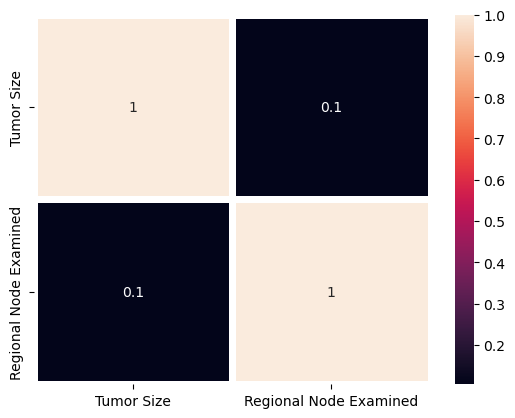

In [22]:
sns.heatmap(correlation, annot=True, linewidths=5)
plt.show()

<p>La correlación entre el número de ganglios examinados y el tamaño del tumor es baja, con un valor de 0.1. Esto indica que no existe una relación fuerte o significativa entre estas dos variables en el contexto de este análisis. En otras palabras, el tamaño del tumor no parece influir de manera determinante en la cantidad de ganglios examinados. Es importante tener en cuenta este aspecto al interpretar los resultados y considerar otras variables que puedan estar más relacionadas con el número de ganglios examinados.</p>

## ¿Cuál es la tasa de supervivencia promedio en meses para los pacientes?

In [23]:
months_avg_survivor = df['Survival Months'].mean()
months_avg_survivor

71.29796222664015

<p>Podemos observar que el promedio del tiempo de supervivencia de los pacientes es de <strong>71.2</strong> meses, lo que equivale a aproximadamente <strong>5.9</strong> años<p/>

## ¿Hay diferencias en la tasa de supervivencia entre pacientes de diferentes razas?

In [24]:
survivor_race = df.groupby('Race')['Survival Months'].mean().to_frame().reset_index().sort_values('Survival Months')
survivor_race

,Race,Survival Months
0,Black,66.611684
2,White,71.517140
1,"Other (American Indian/AK Native, Asian/Pacifi...",73.221875


### Exportacion

In [43]:
survivor_race.to_csv('./df_resultantes/survivor_to_race.csv')

<p>No parece haber una diferencia significativa en la tasa de supervivencia entre pacientes de diferentes razas. Tanto los pacientes negros como los pacientes blancos tienen tasas de supervivencia promedio similares, con 66 meses para pacientes negros y 71 meses para pacientes blancos. Esto sugiere que la raza en sí misma no es un factor determinante en la supervivencia de los pacientes frente al cáncer de mama en este conjunto de datos</p>

## ¿Existe alguna relación entre el tamaño del tumor  y el estado de metástasis?

In [25]:
cross_tab = pd.crosstab(df['T Stage'], df['A Stage'])
cross_tab

A Stage,Distant,Regional
T Stage,,
T1,9,1594
T2,30,1756
T3,15,518
T4,38,64


### Exportacion

In [44]:
cross_tab.to_csv('./df_resultantes/relatioship_size_metastasis.csv', index=False)

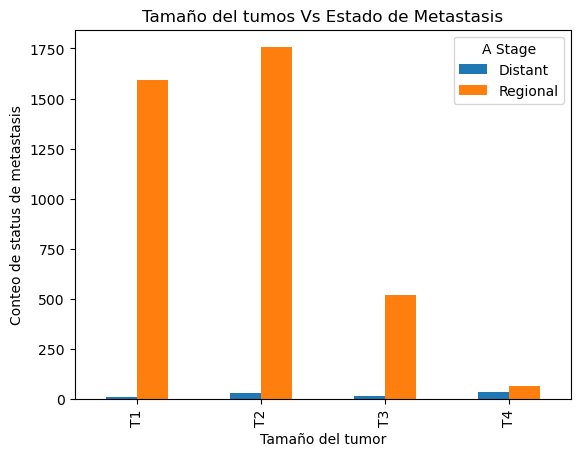

In [26]:
cross_tab.plot(kind='bar')
plt.xlabel('Tamaño del tumor')
plt.ylabel('Conteo de status de metastasis')
plt.title('Tamaño del tumos Vs Estado de Metastasis')
plt.show()

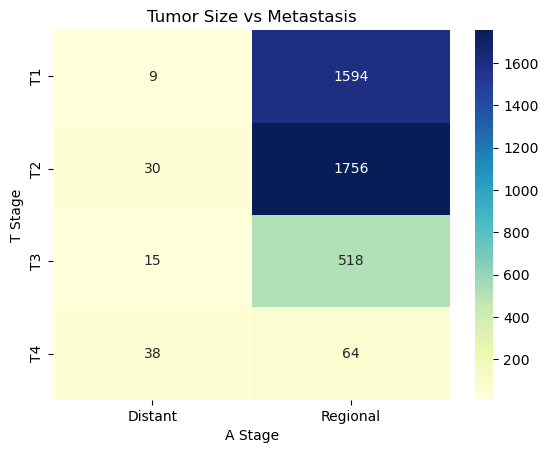

In [27]:
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('A Stage')
plt.ylabel('T Stage')
plt.title('Tumor Size vs Metastasis')
plt.show()

<p>T1,T2,T3,T4 reflejan el tamaño del tumor, estas tienen un orden logico es decir que entre mas grande el numero que acompaña la T mas grande es el tumor</p><br>
<p>Estado de Metastasis <br> <strong>Regional</strong>: El cáncer se diseminó a los ganglios linfáticos, tejidos u órganos cercanos.<br>
<strong>Distante</strong>: El cáncer se diseminó a otras partes distantes del cuerpo </p>

<p><strong>Conclusion:</strong> La conclusión sobre la relación entre el tamaño del tumor y el estado de metástasis es que existe una asociación significativa entre ambas variables. A medida que el tamaño del tumor aumenta, se observa un incremento en los casos de metástasis a distancia, mientras que los tumores más pequeños tienen una mayor incidencia de metástasis regional. Estos hallazgos sugieren que el tamaño del tumor puede influir en la forma en que se propaga el cáncer, sin embargo pueden haber otros factores que tambien influyan, es decir que quizas el tamaño no es el unico factor determinante</p>

## Cuantas personas mueren segun la edad en nuestro conjunto de datos?

In [28]:
only_dead = df[df['Status']== 'Dead']
count_dead_age = only_dead.groupby('Age')['Status'].size().reset_index(name='Deads')
count_dead_age

,Age,Deads
0,30,2
1,31,4
2,32,2
3,33,4
4,34,1
5,35,2
6,36,4
7,37,4
8,38,12
9,39,12


### Exportacion

In [45]:
count_dead_age.to_csv('./df_resultantes/count_dead_age.csv', index=False)

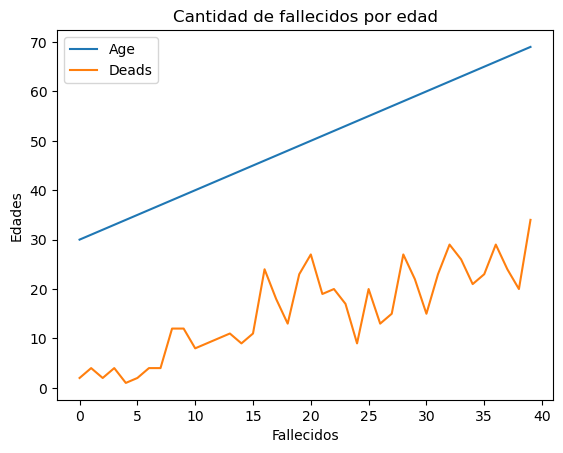

In [29]:
count_dead_age.plot(kind='line')
plt.xlabel('Fallecidos')
plt.ylabel('Edades')
plt.title('Cantidad de fallecidos por edad')
plt.show()

<p>En resumen, el análisis de las muertes en función de la edad revela una tendencia alcista en la mortalidad a medida que aumenta la edad de los pacientes, si bien existen algunos puntos que muestran una disminución en las muertes en ciertos rangos de edad, la tendencia general es ascendente. lo que indica una asociación significativa entre la edad y el riesgo de fallecimiento por cáncer de mama</p>

## ¿Hay diferencias significativas en la proporción de supervivientes y fallecidos en diferentes grupos de edad?

In [30]:
relation_old_status = pd.crosstab(df['Age'], df['Status'])
relation_old_status

Status,Alive,Dead
Age,,
30,3,2
31,10,4
32,11,2
33,11,4
34,13,1
35,18,2
36,20,4
37,24,4
38,33,12


### Exportacion

In [48]:
relation_old_status.to_csv('./df_resultantes/alive_dead_to_age.csv', index=False)

<h3>Hallazgo Alentador</h3><br>
<p>Al analizar los datos para responder esta pregunta, encontramos un hecho alentador: sin importar el grupo de edad al que pertenezcan los pacientes, la proporción de supervivientes es mayor que la de fallecidos. Este hallazgo es un recordatorio de que la lucha contra el cáncer es una batalla en la que se pueden obtener resultados positivos.</p>

## Extiste una relacion o asociacion entre el rango de edad de los pacientes y el status "sobrevivientes y fallecidos"?

<h4>Creacion de rango de edades para hacer una comparacion de asociacion y relacion mas legible, es decir las edades se agruparan en tres categorias, joven-adulto, adulto-mayor y tercera-edad</h4>

In [31]:
ranges = [30,40,50,np.inf]
group_names = ['Joven-adulto', 'Adulto Mayor', 'Tercera Edad']
df['Age-category'] = pd.cut(df['Age'], bins=ranges, labels=group_names)
df['Age-category'].unique()

['Adulto Mayor', 'Tercera Edad', 'Joven-adulto', NaN]
Categories (3, object): ['Joven-adulto' < 'Adulto Mayor' < 'Tercera Edad']

<h4>Observemos la relacion y asociacion entre los rango de edades y status</h4>

In [32]:
relation_category_age_status = pd.crosstab(df['Age-category'], df['Status'])
relation_category_age_status

Status,Alive,Dead
Age-category,,
Joven-adulto,244,53
Adulto Mayor,1041,155
Tercera Edad,2120,406


### Exportacion

In [47]:
relation_category_age_status.to_csv('./df_resultantes/age_category_alive_dead.csv', index=False)

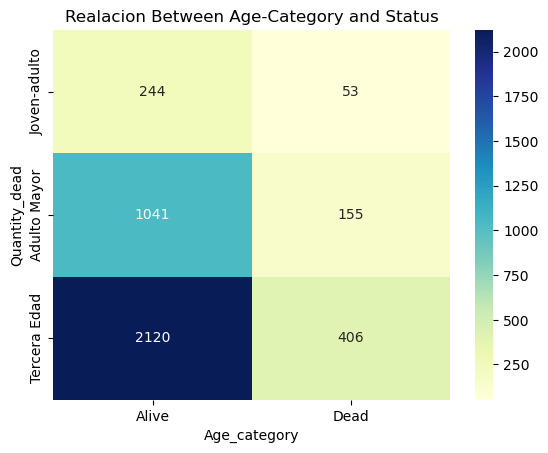

In [33]:
sns.heatmap(relation_category_age_status, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Age_category')
plt.ylabel('Quantity_dead')
plt.title('Realacion Between Age-Category and Status')
plt.show()

<h4>Miremos solo la relacion entre los rangos de edad y el status fallecidos para responder a la pregunta de manera mas puntual</h4>

In [34]:
df_status_dead = df[df['Status'] == 'Dead']
df_status_dead.head(1)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Age-category
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead,Tercera Edad


In [35]:
relation_age_category_dead = pd.crosstab(df_status_dead['Age-category'], df_status_dead['Status'])
relation_age_category_dead

Status,Dead
Age-category,
Joven-adulto,53
Adulto Mayor,155
Tercera Edad,406


### Exportacion

In [49]:
relation_age_category_dead.to_csv('./df_resultantes/age_category_relatioship_dead.csv')

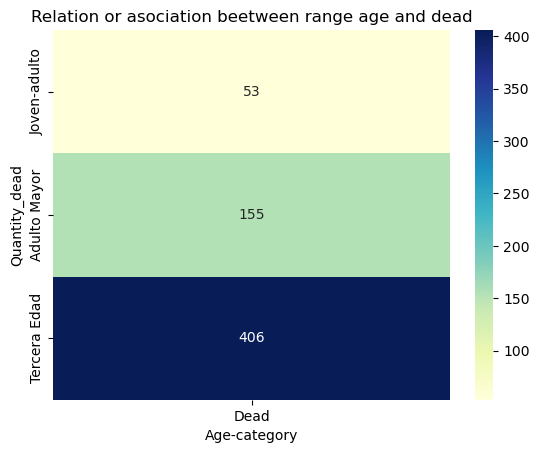

In [36]:
sns.heatmap(relation_age_category_dead, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Age-category')
plt.ylabel('Quantity_dead')
plt.title('Relation or asociation beetween range age and dead')
plt.show()

<p>Al analizar la relación entre las categorías de edad y el estatus (vivos o muertos) de los pacientes, se observa una tendencia significativa. A medida que aumenta el rango de edad, se registra un incremento en el número de muertes, lo cual sugiere una mayor vulnerabilidad en la población de mayor edad. Sin embargo, también se observa un aumento en el registro de pacientes vivos en los rangos de edad más altos. Esto indica que la mayoría de los pacientes pertenecen a grupos de mayor edad, lo que puede influir en la distribución de los resultados. Es importante considerar estos factores al analizar la relación entre edad y estatus, y tomar en cuenta que la muestra está sesgada hacia una población mayor.</p>

## Conclusion
En resumen, se han respondido satisfactoriamente las preguntas y objetivos planteados en el análisis de datos de pacientes con cáncer de mama. Este proceso ha permitido utilizar conocimientos técnicos para abordar un tema relevante en el ámbito de la salud. Es importante destacar que estos resultados son específicos para el conjunto de datos analizado y no representan cifras absolutas a nivel mundial.

Se ha demostrado la existencia de relaciones significativas entre variables como la edad, el tamaño del tumor, el estado de metástasis y el estado vital de los pacientes. Sin embargo, es importante tener en cuenta que existen múltiples variables y preguntas adicionales que podrían abordarse con estos datos, lo que abre la puerta a futuras investigaciones.

En definitiva, este análisis proporciona un punto de referencia valioso para comprender y explorar aspectos relevantes del cáncer de mama. Debe ser considerado como una contribución inicial en un campo amplio y en constante evolución, lo que resalta la importancia de continuar investigando y ampliando nuestro conocimiento en este ámbito de vital importancia para la salud pública.